In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Grab and process the raw data.
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
             "master/sms_spam_collection/SMSSpamCollection"
            )
sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw.columns = ['spam', 'message']

In [5]:
keywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent', 'apply','prize','subscription']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [6]:
sms_raw['allcaps'] = sms_raw.message.str.isupper()

In [7]:
sms_raw['spam'] = (sms_raw['spam'] == 'spam')
# Note that if you run this cell a second time everything will become false.
# So... Don't.

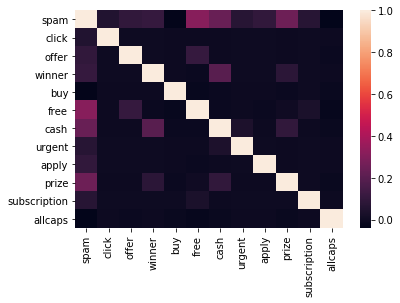

In [8]:
sns.heatmap(sms_raw.corr())

In [9]:
data = sms_raw[keywords + ['allcaps']]
target = sms_raw['spam']

In [19]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(data, target)
y_pred_gnb = gnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred_gnb).sum()
))

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(data, target)
y_pred_clf = clf.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred_clf).sum()
))   
    
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(data, target)
y_pred_log = log.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred_log).sum()
))

Number of mislabeled points out of a total 5572 points : 549
Number of mislabeled points out of a total 5572 points : 549
Number of mislabeled points out of a total 5572 points : 682
Number of mislabeled points out of a total 5572 points : 562


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


A spam message is: URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18

An example of a message that would proabably pass the spam filter: SERIOUS! You have received a 1 week WITHOUT COST participation in our $100,000 payoff! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18